In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Доверительный интервал
__Зачем нужны доверительные интервалы__
- Точечная оценка не отражает всей картины, лишь готоворит об оценке полученной на опредленной выборке, но выборка может быть немного другой $\Rightarrow$ неопределенность, и чтобы понять в каком диапазоне она варьируется необходимо строить **доверительные интервалы** 
- Доверительный интервал показывает насколько мы уверены в точечной оценке (как наша оценка выглядит в худшем и в лучшем случае)
- Доверительные интервалы строятся для прогнозов
- Границы предсказательного интервала - константы, между ними лежит случайная величина
- Границы доверительного интервала  - случаные величины, внутри - константа

__Определение__
 - Интервал $[\theta_{L},\theta_{U}] $ называется __доверительным__ для параметра $\theta$ с уровнем значимости $1-\alpha$, если при бесконечном повторении эксперимента в $100*(1-\alpha)$ % случаев этот интервал будет покрывать истинное значение параметра $\theta$
 - $\alpha$ - уровень значимости
 - Если мы много раз измеряем скрепку то с вероятностью $1-\alpha$ наш доверительный интервал покрывает ее истинную длину 

# I) Асимптотические доверительные интервалы
 - ЦПТ позволяет строить дов интервал для любого среднего
 - Наблюдаем $X_{1}, ..., X_{n}$
    - iid
    - число наблюдений $n$ велико
    - нет выбросов
- Тогда
$$\frac{\overline{x} - \mu}{\sqrt{\frac{\sigma^2}{n}}} \overset{asy}{\sim} N(0, 1)$$

$P(\overline{x} -z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}
\leq
   \mu
\leq 
   \overline{x}+z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}) = 1 - \alpha
$

__Почему можно заменить $\hat{\sigma}$ на $\sigma$?__
- так как $\hat{\sigma}$ состоятельная оценка для $\sigma$ (сходится по вероятности)
- тогда можно домножить и получить искомый результат 
$$ \frac{\frac{\hat{\sigma}^2}{n}}{\frac{\sigma^2}{n}}* \frac{\overline{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{d, \; при \; n \rightarrow \infty}{\sim} N(0, 1)$$

$$  \frac{\overline{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{d, \;при\;  n \rightarrow \infty}{\sim} N(0, 1)$$

__Ассиптотический доверительный интервал для дисперсии__

$$s^2 = \frac{n}{n -1} * \hat{\sigma}^2 = \frac{n}{n -1} * (\overline{x^2} - \overline{x}^2)$$

$$s^2 \sim N(\sigma^2, \frac{\mu_{4} - \sigma^4}{n})$$ 
где $\mu_{4} = E[(X_{i} - \mu)^2]$

# II) Доверительные интервалы для маленьких выборок

# Точные интервалы для нормальных выборок (маленькие выборки)
Используется 
 - если выборка маленькая (n любое в общем случае)
 - если выборка точно взята из *нормального распределениия*
 

Для больших выборок можно пологать, что $\mu = \overline{x} \sim N(\mu, \frac{\sigma^2}{n})$, но для конечной маленькой выборки 
$\mu = \overline{x} \; not \:\sim N(\mu, \frac{s^2}{n})$

__Если необходимо построить доверительный интервал для  $\sigma$:__
- $\mu$ известна: 
- $\mu$ неизвестна:

__Если необходимо построить доверительный интервал для  $\mu$:__
- $\sigma$ известна
- $\sigma$ неизвестна

## 1 союзник: $\chi^2$ распределение

Пусть $X_1, ..., X_k \sim iid \; N(0, 1)$, тогда $Y = X_1^2+ ...+ X_k^2 \sim \chi_k^2$

Из-за квадратов принимает только положительные значения

Распределение ХИ-квадрат применяется в различных методах математической статистики:
- при построении доверительных интервалов для дисперсии (**так как дисперсия это по сути сумма квадратов**);
- при проверке гипотез о дисперсии нормального распределения ;
- при проверке гипотез с помощью критерия согласия Пирсона (согласуются ли эмпирические данные с нашим предположением о теоретической функции распределения или нет, англ. Goodness-of-fit)
- при проверке гипотез с помощью критерия независимости хи-квадрат (используется для определения связи между двумя категориальными переменными, англ. Chi-square test of association).
$$E(X) = k$$
$$Var(X) =2k$$

Число степеней свободы 3


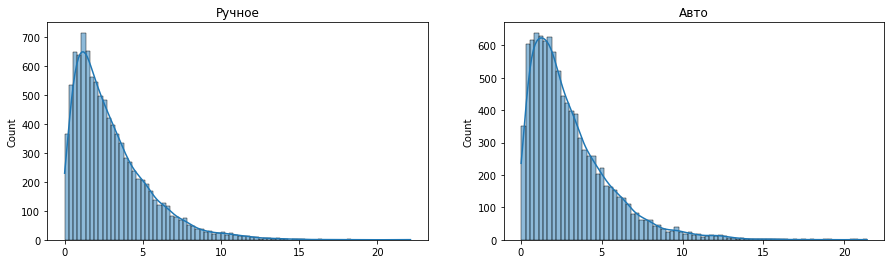

In [2]:
def plot_chi2_distribution(df = 1, size= 1000):
    '''
    Функция, которая возращвет два графика хи^2 распределения. Первый выведен по определению, второй - автоматически из библиотеки scipy

    Аргументы
    - df - кол-во степеней свободы
    - size - размер выборки
    '''
    print(f'Число степеней свободы {df}')
    # инициализация нормального и хи^2   распредлений
    chi = stats.chi2(df = df)
    norm = stats.norm(loc=0, scale=1)
    # выполнение преобразований над нормальный распределнием, чтобы получить хи^2
    data = [sum(map(lambda x: x**2, i)) for i in norm.rvs(size = (size, df))]

    f, ax = plt.subplots(1, 2, figsize = (15, 4))
    sns.histplot(data, kde=True, ax=ax[0]).set_title('Ручное')
    sns.histplot(chi.rvs(size), kde=True, ax=ax[1]).set_title('Авто')
plot_chi2_distribution(df = 3, size=10000)


In [3]:
# привер расчета p-value
z = 1.96
p = 1 - (stats.norm.cdf(z) - stats.norm.cdf(-z))
print(f'p-value = {p:.2}')

p-value = 0.05


## 2 союзник: $t_{n}$ распределение

Пусть $ Y_{0}, Y_{1},\ldots ,Y_{n}$ — независимые стандартные нормальные случайные величины, такие что
 $Y_{i} \sim {\mathcal {N}}(0,1)$ Тогда распределение случайной величины 
 $$t =\frac {Y_{0}}{\sqrt {{\frac {1}{n}}\sum \limits _{i=1}^{n} Y_{i}^{2}}}$$
называется распределением Стьюдента с n степенями свободы $ t \sim \mathrm {t} (n)$

Распределение Стьюдента возникает в связи с распределением выборочной дисперсии. 
Пусть $X_{1},\ldots ,X_{n}$ независимые случайные величины, такие что $ X_{i}\sim \mathrm {N} (\mu ,\sigma ^{2}),\;i=1,\ldots ,n$ Обозначим ${\bar  {X}}$ выборочное среднее этой выборки, а $S^{2} = \frac{\Sigma({X_i-\overline{X}})^2}{n-1}$ её выборочную дисперсию. Тогда 
$$\frac{\bar{X}-\mu}{S/\sqrt{n}} \sim \mathrm {t} (n-1) $$
С этим фактом связано использование распределения Стьюдента в статистике для точечного оценивания, построения доверительных интервалов и тестирования гипотез, касающихся неизвестного среднего выборки из нормального распределения.



Число степеней свободы 30


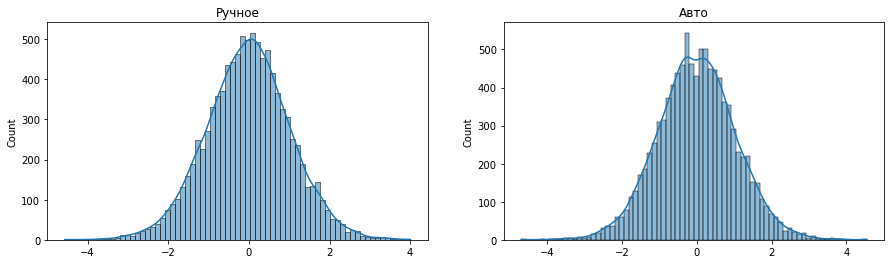

In [4]:
def plot_t_distribution(df = 1, size= 1000):
    '''
    Функция, которая возращвет два графика распределения Стьюдента.
     Первый выведен по определению, второй - автоматически из библиотеки scipy

    Аргументы
    - df - кол-во степеней свободы
    - size - размер выборки
    '''
    print(f'Число степеней свободы {df}')
    # инициализация нормального и t  распредлений
    t_dist = stats.t(df = df)
    norm = stats.norm(loc=0, scale=1)
    # выполнение преобразований над нормальный распределнием, чтобы получить t распределение
  
    data = [norm.rvs(1)[0] / (np.sqrt(sum(map(lambda x: x**2, i))/df)) for i in norm.rvs(size = (size, df))]

    f, ax = plt.subplots(1, 2, figsize = (15, 4))
    sns.histplot(data, kde=True, ax = ax[0]).set_title('Ручное')
    sns.histplot(t_dist.rvs(size), kde=True, ax=ax[1]).set_title('Авто')

plot_t_distribution(df = 30, size=10000)


## 3 союзник: $F_{d_{1}, d_{2}}$ распределение

Пусть $Y_{1},Y_{2}$ — две независимые случайные величины, имеющие распределение хи-квадрат: $Y_{i}\sim \chi ^{2}(d_{i})$, где $ d_{i}\in \mathbb {N} ,\;i=1,2$. Тогда распределение случайной величины
$$F=\frac{Y_{1}/d_{1}}{Y_{2}/d_{2}}$$ 

называется распределением Фишера (распределением Снедекора) со степенями свободы 
$d_{1}, d_{2}$. Пишут $ F\sim \mathrm {F} (d_{1},d_{2})$

Число степеней свободы (10, 20)


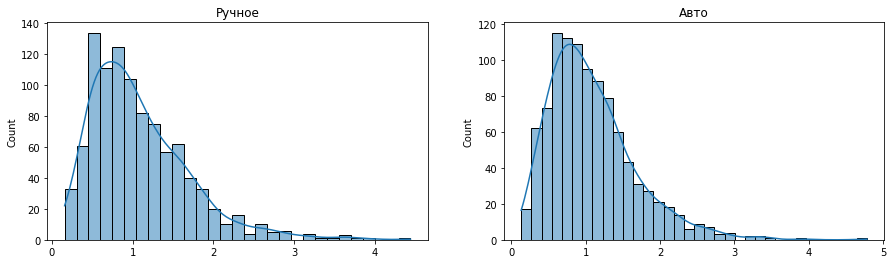

In [5]:
def plot_f_distribution(df1 = 1, df2 = 2,  size= 1000):
    '''
    Функция, которая возращвет два графика F распределения.
     Первый выведен по определению, второй - автоматически из библиотеки scipy

    Аргументы
    - df1, df2 - кол-во степеней свободы
    - size - размер выборки
    '''
    print(f'Число степеней свободы {df1 , df2}')
    
    # инициализация нормального и хи распредлений
    chi_1 = stats.chi2(df = df1).rvs(size)
    chi_2 = stats.chi2(df = df2).rvs(size)
    f_dist = stats.f(df1, df2)
    
    # выполнение преобразований над хи распределнием, чтобы получить F распределение
    data = [(i/ df1 ) / (j/ df2) for i, j in zip(chi_1, chi_2)]
  
    f, ax = plt.subplots(1, 2, figsize = (15, 4))
    sns.histplot(data, kde=True, ax = ax[0]).set_title('Ручное')
    sns.histplot(f_dist.rvs(size), kde=True, ax=ax[1]).set_title('Авто')

plot_f_distribution(df1 = 10, df2 = 20,  size= 1000)


## 4 союзник: Теорема Фишера

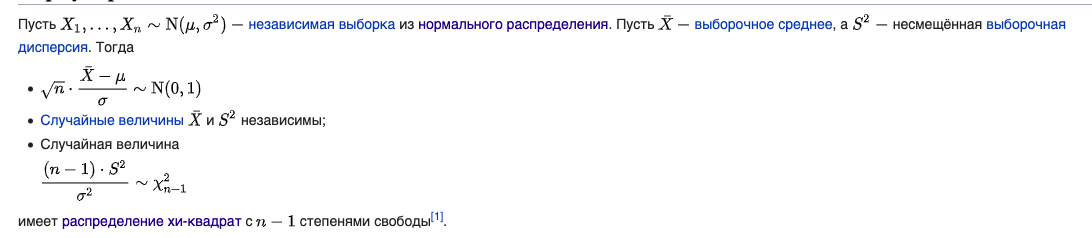

In [6]:
from IPython.display import Image
Image('фото/Теорема Фишера.png')

Разберемся с каждой из четырех описанных выше ситуаций

__1) Необходимо построить доверительный интервал для  $\mu$, когда дисперсия известна__

- В этом случае поступаем как обычно, а именнно рассчитываем $z_{stats}$, получаются точные доверительные интервалы
- Когда может быть исспользована,например, в ситуации когда мы что-то измеряем и знаем ошибку прибора
- Здесь не нужна ЦТП, а распределение получится точным, так как сумма нормальных случайных велечин - нормальная величина

__2) Необходимо построить доверительный интервал для  $\mu$, когда дисперсия известна__
- Не можем использовать ЦТП, так как на бесконечной выборке средние распредлено нормальное, а на маленькой  - нет 
- расределение у выличины будет $t(n-1)$

Чтобы это доказать, то необходимо использовать $\chi_k^2$, $t_n$, $F_{n, k}$, теорема Фишера

В формуле ниже надо заменить выборочную дисперсию $s^2$ на $\sigma^2$, чтобы получить нормальное распредление (другими словами: если такую замену можно сделать, то она будет распределена нормально)

$$t = \frac{\overline{x} - \mu}{\sqrt{\frac{s^2}{n}}}$$

  * Такую замену можно сделать с использованием теоремы Фишера
  * Теорема фишера говорит, что надо использовать распределение $\chi_2$
  * Далее получается, что величина t имеет
      - в числителе нормальное распределение
      - в знаменателе хи квадрат распределение 
      - Следовательно, получается $t$ - распредление


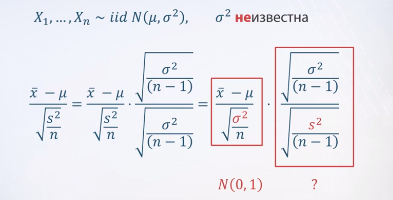

In [7]:
# вывод формулы
Image('фото/Формула1.png')

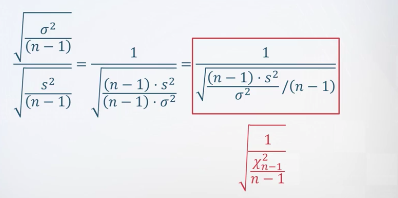

In [8]:
Image('фото/Формула2.png')

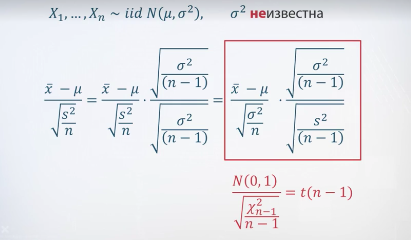

In [9]:
# таким образом получаем в числите - нормальную величину, в знаменателе - хи квадрат распределение 
Image('фото/Формула3.png')

__Резюме__

Ассимптотический доверительный интервал
 - союзник ЦТП
 - Работает только при большом n
 - Выборка независимая, без аномалий

 Точный  доверительный интервал
 - союзники теорема Фишера, t- распределение
 - работает при любом n
 - Выборка незавимая из нормального распределения


In [10]:
# Примеры
# измерели зарплату. Получили оценку срднего равную 43
# выборочная дисперсия равна 5.1
# дисперсия в генеральной совокупности 5.2
# построить доверительные интервалы

def calculate_ci(overline_x:float, s:float, sigma:float, n:int, p = 0.05, print_result = True):
    alpha = p/2
    # ассимптотический 
    def asy():
        coef = stats.norm().isf(alpha)
        return overline_x-s*coef/np.sqrt(n), overline_x+s*coef/np.sqrt(n)
    
    # точный извесная дисперсия
    def correct_with_known_variance():
        coef = stats.norm().isf(alpha)
        return overline_x-sigma*coef/np.sqrt(n), overline_x+sigma*coef/np.sqrt(n)
    
    # точный неизвестная дисперсия
    def correct_with_unknown_variance():
        coef = stats.t(df = n-1).isf(alpha)
        return overline_x-s*coef/np.sqrt(n), overline_x+s*coef/np.sqrt(n)
    
    if print_result:
        print(f'ассимптотический: {asy()}')
        print(f'точный извесная дисперсия: {correct_with_known_variance()}')
        print(f'точный неизвесная дисперсия: {correct_with_unknown_variance()}')
    else:
        return asy(), correct_with_known_variance(),correct_with_unknown_variance() 

In [11]:
asy, know, unknown = calculate_ci(overline_x = 43, s = 5.1, sigma = 5.2, n=10, p = 0.05, print_result=False)

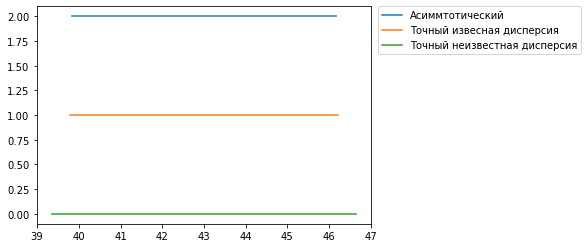

In [12]:
from matplotlib import pyplot as plt

ax = sns.lineplot(x = np.linspace(asy[0], asy[1]), y = 2, label='Асиммтотический')
ax = sns.lineplot(x = np.linspace(know[0], know[1]), y = 1, label='Точный извесная дисперсия')
ax = sns.lineplot(x = np.linspace(unknown[0], unknown[1]), y = 0, label='Точный неизвестная дисперсия')

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

- Часты доверительные интервалы оказываются шире асимптотических (так как тяжелые хвосты у распределения Стьюдента )
- При больших объемах выборки разница между точным и ассимтотическим интервалами минимальна

# Точные доверительные интервалы для разности средних (независимые выборки)

In [13]:
# везже ниже воборки взяты из нормального распределения

__Дисперсии известны__

$$
\frac{(\bar x - \bar y) - (\mu_{x} - \mu_{y})}{\sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}} \sim N(0, 1)
$$
Тогда
$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}} \sim N(0, 1)
$$

__Дисперсии неизвестны, но равны__

$$
\frac{(\bar x - \bar y)-(\mu_{x} - \mu_{y})}{\sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}} \sim t(n_{x}+n_{y} - 2)
$$

Тогда 
$$
\bar x - \bar y \pm t(n_{x}+n_{y}-2)_{crit} \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

где обобщенная оценка дисперсии имеет вид

$$s^2 = \frac{(n_{x} - 1) * s_{x}^2 + (n_{y} - 1) * s_{y}^2}{n_{x} + n_{y} -2}$$

__Дисперсия неизвестна и различаются__

Проблема Беренца-Фишера: невозможно сравнить средние двух независимых выборок, дисперсии которых неизвестны
$$
\frac{(\bar x - \bar y)-(\mu_{x} - \mu_{y})}{\sqrt{\frac{s_{x}^2}{n_x} + \frac{s_{y}^2}{n_y}}} \sim t(v)
$$


Тогда 
$$
\bar x - \bar y \pm t(v)_{crit} \cdot \sqrt{\frac{s_{x}^2}{n_x} + \frac{s_{y}^2}{n_y}}
$$

Приближенное распределение (распределение Уэлча)

$$v = \frac{(\frac{s^2}{n_x} + \frac{s^2}{n_y})^2}{\frac{s_{x}^4}{n_{x}^2 * (n_{x} -1)} + \frac{s_{y}^4}{n_{y}^2 * (n_{y} -1)}}$$

Апроксимация Уэлча хорошо работает, если
- или $n_{x} = n_{y}$
- или знак неравенсва между $n_{x}$ и $n_{y}$ такой же, как между $\sigma_{x}$ и $\sigma_{y}$

#  Доверительные интервалы для разности средних (зависимые выборки)

- измерения производились на одних и тех же объектах ( и нужно понять как поменялся показатель через какой-то промежуток времени)
- можем посмотреть прирост на отдельных субъектах $d_{i} = X_{i} - Y_{i}$
- рассчитать дисперсию, где $\overline{d} = \frac{\Sigma d_{i}}{n}$ и $s = \frac{1}{n-1} * \Sigma(d_{i} - \overline{x})^2$
- разность будет иметь распредление Стьюдента

- Чем меньше значение p-value, тем больше мы боимся ошибиться
- нулевую гипотезу формулируют так, чтобы от нее было сложно отказаться (на рынке труда нет дискриминации, лекарство бесполезно и прочее)
- тест Фишера - помогают понять взаимосвязаны ли между собой два дискретных признака

In [14]:
# реализация теста фишера
# все кол-во
all_cnt = 20
# взяли 7 мальчиков
take_man = 7
# взяли девочек
take_girl = 1
# всего взяли человек
total = 8 

In [15]:
from math import factorial
number_of_combination = lambda x , y : factorial(y)/ (factorial(x) * factorial(y-x))

possible_number_of_girl = range(total)

results = []
for girl in possible_number_of_girl:
    men = total - girl
    probobility = number_of_combination(men, total)*number_of_combination(girl, all_cnt - total)/number_of_combination(total, all_cnt)
    results.append([girl, probobility])
x, y = [results[i][0] for i in range(len(results))], [results[i][1] for i in range(len(results))]

__Все, что левее критического значения мы считаем аномальным и отказывается от нулевой гипотезы__

In [16]:
alpha = 0.01
p_value = 0
for i, j in zip(x, y):
    if i <= take_girl:
        p_value += j

print(f'Вероятность такого же или еще более худшего варианта равно {p_value}')
if p_value < alpha:
    print('Отклонить нулевую гипотезу')
else:
     print('Принять нулевую гипотезу')

Вероятность такого же или еще более худшего варианта равно 0.000770024609033897
Отклонить нулевую гипотезу


<AxesSubplot:>

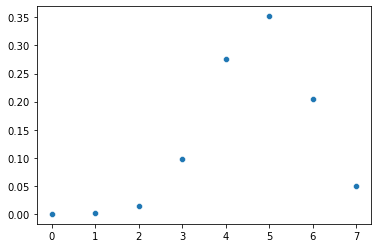

In [17]:
sns.scatterplot(x =x,y =y)

# Точные доверительные интервалы для дисперсий 

- Необходимость возникает, когда нам надо следить за разбросом внутри какого-то процесса
- Примеры:
    * фасовка чая по 100 грамм, должна иметь фиксированную погрешность, в противном случае бракованная партия
    * дисперсия - это ценка риска при вложении в ценные бумаги

__3) Необходимо построить доверительный интервал для  $\sigma$, когда $\mu$ известно__

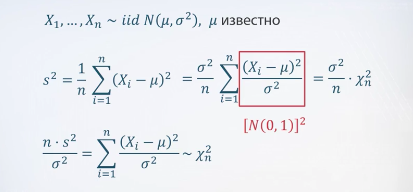

In [18]:
Image('фото/Формула4.png')

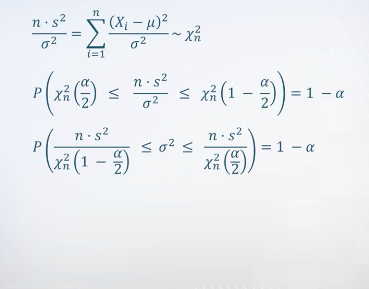

In [19]:
Image('фото/Формула5.png')

__4) Необходимо построить доверительный интервал для  $\sigma$, когда $\mu$ неизвестно__

Здесь хи квадрат будет с $n-1$ степенями свободы, так как одна степень свободы пойдет на расчет срднего значения по выборке

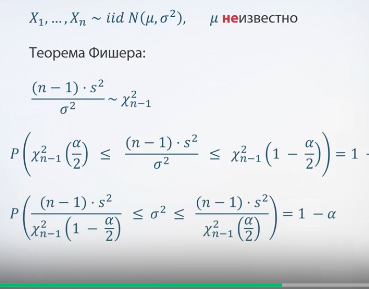

In [20]:
Image('фото/Формула7.png')

# Точный доверительный интервал для оценки отношения дисперсий

Более робастной статистикой для анализа разницы между дисперсиями является отношение дисперсий

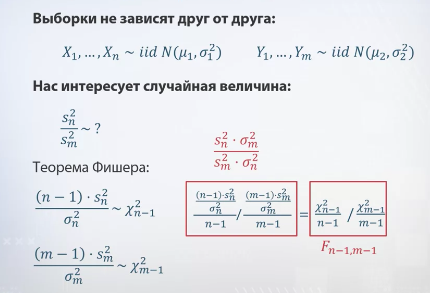

In [21]:
Image('фото/Формула6.png')

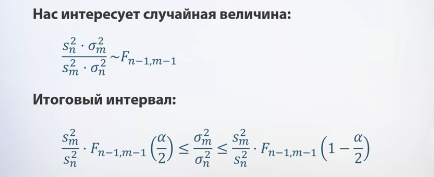

In [22]:
Image('фото/Формула8.png')

In [38]:
def get_sample_number(sigma, delta, p):
    '''
    Возвращает кол-во элментов выборки для заданной длины доверительного интервала 
    '''
    alpha = p/2
    coef = stats.norm().isf(alpha)
    return (sigma/ delta * 2*coef)**2

In [39]:
get_sample_number(sigma = 35, delta =20, p=0.05)

47.05787055350305

- Длина доверительного интервала НЕ увеличивается при увеличении уровня значимости
- Чем больше объём выборки, тем короче доверительный интервал
- Границы предиктивного интервала — это константы
- Границы доверительного интервала — это случайные величины, которые с вероятностью  \gamma γ накрывают истинное значение параметра
- При большом объёме выборки разница между асимптотическим доверительным интервалом и доверительным интервалом, построенным на основе распределения Стьюдента, минимальна